### Priprava podatkov

In [42]:
import pandas as pd

def v_uro(series):
    ure = []
    for i, ele in series.items():
        ure.append(int(ele.split(":")[0]))
    return pd.Series(ure, dtype="int")

def v_mesec(series):
    mesec = []
    for i, ele in series.items():   
        mesec.append(int(str("{:.3f}".format(ele))[:-5])) 
    return pd.Series(mesec, dtype="int")

def v_leto(series):
    leto = []
    for i, ele in series.items():
        leto.append(int(str("{:.3f}".format(ele).replace(".",""))[-4:]))
    return pd.Series(leto, dtype="int")

df = None
for year in range(2012, 2022):
    df_temp = pd.read_csv("data/data" + str(year) + ".csv", delimiter=";", encoding="utf8", low_memory=False)
    df_temp.iloc[:, 0] = df_temp.iloc[:, 0] + year * 1000_000
    df_temp.insert(1, "LetoStoritve", v_leto(df_temp.iloc[:, 1]), True)
    df_temp.iloc[:, 2] = v_mesec(df_temp.iloc[:, 2])
    df_temp.iloc[:, 3] = v_uro(df_temp.iloc[:, 3])
    df_temp.iloc[:, 8] = df_temp.iloc[:, 8].astype("string")
    df_temp.iloc[:, 4] = df_temp.iloc[:, 4].replace(["PONEDELJEK", "TOREK", "SREDA", "ČETRTEK", "PETEK", "SOBOTA", "NEDELJA"], [1, 2, 3, 4, 5, 6, 7]).astype(int)
    df_temp.iloc[:, 6] = df_temp.iloc[:, 6].replace(["DA", "NE"], [1, 0]).astype("bool")
    df_temp.iloc[:, 9] = df_temp.iloc[:, 9].replace(["GOSPODARSKA", "SPLOŠNA"], [1, 0]).astype("bool")
    df_temp.iloc[:, 10] = df_temp.iloc[:, 10].replace(["ORGANIZIRANA", " "], [1, 0]).astype("bool")
    df_temp.iloc[:, 11] = df_temp.iloc[:, 11].replace(["MLADOLETNIŠKA", " "], [1, 0]).astype("bool")
    df_temp.iloc[:, 12] = df_temp.iloc[:, 12].replace(["DA", "NE"], [1, 0]).astype("bool")
    df_temp.iloc[:, 32] = df_temp.iloc[:, 32].replace(["DA", "NE"], [1, 0]).astype("bool")

    df = pd.concat([df, df_temp], ignore_index = True)

df.iloc[:, 0:-1]

,ZaporednaStevilkaKD,LetoStoritve,MesecStoritve,UraStoritve,DanVTednu,PUStoritveKD,Povratnik,OpisKD,PoglavjeKD,GospodarskiKriminal,...,VrstaZakljucnegaDokumenta,ZaporednaStevilkaOsebeVKD,VrstaOsebe,StarostniRazred,Spol,Drzavljanstvo,Poskodba,VplivAlkohola,VplivMamil,OrganiziranaZdruzba
0,2012000001,2000,1,23,6,DIREKTORAT ZA UPRAVNE NOTRANJE ZADEVE,False,KZ08/100-/2// - GENOCID,KD ZOPER ČLOVEČNOST,False,...,OVADBA,1001.0,ŽRTEV,44-54,MOŠKI,SLOVENSKO,BREZ POŠKODBE,NN,NN,False
1,2012000002,2004,8,23,1,PU KRANJ,False,KZ08/204-/2/S/ - TATVINA,KD ZOPER PREMOŽENJE,False,...,OVADBA,2001.0,NEOVADENI OSUMLJENEC (ARHIV),18-24,MOŠKI,SLOVENSKO,NaN,NE,NE,False
2,2012000002,2004,8,23,1,PU KRANJ,False,KZ08/204-/2/S/ - TATVINA,KD ZOPER PREMOŽENJE,False,...,OVADBA,2002.0,NEOVADENI OSUMLJENEC (ARHIV),18-24,MOŠKI,SLOVENSKO,NaN,NE,NE,False
3,2012000003,2005,4,16,1,PU LJUBLJANA,False,KZ08/205-/1/1 S/ - VELIKA TATVINA,KD ZOPER PREMOŽENJE,False,...,POROČILO,3001.0,ŽRTEV,34-44,MOŠKI,SLOVENSKO,BREZ POŠKODBE,NN,NN,False
4,2012000004,2006,2,14,4,PU LJUBLJANA,False,KZ08/217-/2// - PRIKRIVANJE,KD ZOPER PREMOŽENJE,False,...,OVADBA,4001.0,OVADENI OSUMLJENEC,24-34,MOŠKI,SLOVENSKO,NaN,NE,NE,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243421,2021050281,2021,7,19,5,PU LJUBLJANA,False,KZ12/296*/1// - NASILNIŠTVO,KD ZOPER JAVNI RED IN MIR,False,...,OVADBA,50281001.0,ŽRTEV,NAD 64,MOŠKI,SLOVENSKO,BREZ POŠKODBE,NN,NN,False
1243422,2021050281,2021,7,19,5,PU LJUBLJANA,False,KZ12/296*/1// - NASILNIŠTVO,KD ZOPER JAVNI RED IN MIR,False,...,OVADBA,50281002.0,OVADENI OSUMLJENEC,54-64,MOŠKI,SLOVENSKO,NaN,NN,NN,False
1243423,2021050282,2021,10,12,4,PU LJUBLJANA,False,KZ12/192*/2// - ZANEMARJANJE MLADOLETNE OSEBE ...,"KD ZOPER ZAKONSKO ZVEZO, DRUŽINO IN OTROKE",False,...,OVADBA,50282001.0,OVADENI OSUMLJENEC,44-54,MOŠKI,TUJE,NaN,NE,NE,False
1243424,2021050282,2021,10,12,4,PU LJUBLJANA,False,KZ12/192*/2// - ZANEMARJANJE MLADOLETNE OSEBE ...,"KD ZOPER ZAKONSKO ZVEZO, DRUŽINO IN OTROKE",False,...,OVADBA,50282002.0,ŽRTEV,00-07,MOŠKI,SLOVENSKO,BREZ POŠKODBE,NN,NN,False


### 1. Ali sej je karantena spremenila pogostost družinskega nasilja?

In [164]:
#Graf prve in druge karantene, ter splošnega povprečja
#4.2020 - 5.2020, 11.2020 - 1.2021#
    
#Pogledamo če je sploh bil porast po naši dovnmevi
kar_meseci_2020 = pd.DataFrame(columns=df.columns.values.tolist())
kar_meseci_2020 = df.loc[(df['PoglavjeKD'] == "KD ZOPER ZAKONSKO ZVEZO, DRUŽINO IN OTROKE") & ((4 == df['MesecStoritve']) | (11 <= df['MesecStoritve'])) & (df['LetoStoritve'] == 2020)]
a = len(kar_meseci_2020)/3

nekar_meseci_2020 = pd.DataFrame(columns=df.columns.values.tolist())
nekar_meseci_2020 = df.loc[(df['PoglavjeKD'] == "KD ZOPER ZAKONSKO ZVEZO, DRUŽINO IN OTROKE") & ~(((4 == df['MesecStoritve']) | (11 <= df['MesecStoritve']))) & (df['LetoStoritve'] == 2020)]
b = len(nekar_meseci_2020)/9

raz_pro = ((float(a)-(b))/(b))*100

print("2020, ko je potekala karantena, je bilo zabeleženih v povprečju " ,"%.2f" % a, " primerov na mesec, v ostalih mesecih pa ", "%.2f" % b, " primerov.\nŠtevilo primerov se torej razlikuje za ", "%.2f" % raz_pro, "%.\n")


#Preverimo če je do predhodno odstopanje med izbranimi mesecimi(april, november, december) prihajalo že v prejšnjih letih.
#Kaj vse sploh spada pod družinsko nasilje?(KD ZOPER ZAKONSKO ZVEZO, DRUŽINO IN OTROKE(-nepreživnina))
kar_meseci = pd.DataFrame(columns=df.columns.values.tolist())
kar_meseci = df.loc[(df['PoglavjeKD'] == "KD ZOPER ZAKONSKO ZVEZO, DRUŽINO IN OTROKE") & ((4 == df['MesecStoritve']) | (11 <= df['MesecStoritve'])) & (df['LetoStoritve'] < 2020)]
a = len(kar_meseci)/3

nekar_meseci = pd.DataFrame(columns=df.columns.values.tolist())
nekar_meseci = df.loc[(df['PoglavjeKD'] == "KD ZOPER ZAKONSKO ZVEZO, DRUŽINO IN OTROKE") & ~(((4 == df['MesecStoritve']) | (11 <= df['MesecStoritve']))) & (df['LetoStoritve'] < 2020)]
b = len(nekar_meseci)/9

raz_pro = ((float(a)-b)/b)*100

print("V mesecih, ko je potekala karantena, je do leta 2020 bilo zabeleženih v povprečju " ,"%.2f" % a, " primerov na mesec, v ostalih mesecih pa", "%.2f" % b, " primerov.\nŠtevilo primerov se torej razlikuje za", "%.2f" % raz_pro, "%. Sklepamo lahko da med izbranima skupinama mesecev ni bistvene razlike v pogostosti izbranega poglavja kaznivih dejanj.\n")


#Pogledamo razliko v pogostosti v letu 2020 med in izven obdobja z omejitvijo gibanja.

#V osameznih letih je ta vrednost predstavljala sledeče vrednosti
print("Poglejmo še za vsako leto posebaj:\n")
st_kdd = 0
j = 0
y = []
for i in range(2012, 2021):
    kar = 0
    ost = 0
    st_kdd_mesec = 0
    raz_pro = 0
    for n in range(1,13):
        st_kdd_mesec = len(df.loc[(n == df['MesecStoritve']) & (df['LetoStoritve'] == i) & (df['PoglavjeKD'] == "KD ZOPER ZAKONSKO ZVEZO, DRUŽINO IN OTROKE")])
        st_kdd = st_kdd + st_kdd_mesec
        if(n == 4 or n >= 11):
            kar += st_kdd_mesec
        else:
            ost += st_kdd_mesec
    kar = (kar/3)   
    ost = (ost/9)
    raz_pro = ((float(kar)-(ost))/(ost))*100
    y.append(raz_pro)

    print("Leto -", i, "\nApr, Nov, Dec: ", "%.2f" % (kar) , "pov. primerov na mesec. Ostali meseci: ", "%.2f" % (ost), "pov. primerov na mesec.\nŠtevilo primerov družinskega nasilja(v mesecih karantene) se je razlikovalo za ", "%.2f" % raz_pro , "%.")
print("\n")


2020, ko je potekala karantena, je bilo zabeleženih v povprečju  785.00  primerov na mesec, v ostalih mesecih pa  710.67  primerov.
Število primerov se torej razlikuje za  10.46 %.

V mesecih, ko je potekala karantena, je do leta 2020 bilo zabeleženih v povprečju  7800.00  primerov na mesec, v ostalih mesecih pa 7891.78  primerov.
Število primerov se torej razlikuje za -1.16 %. Sklepamo lahko da med izbranima skupinama mesecev ni bistvene razlike v pogostosti izbranega poglavja kaznivih dejanj.

Poglejmo še za vsako leto posebaj:

Leto - 2012 
Apr, Nov, Dec:  1035.33 pov. primerov na mesec. Ostali meseci:  1231.00 pov. primerov na mesec.
Število primerov družinskega nasilja(v mesecih karantene) se je razlikovalo za  -15.89 %.
Leto - 2013 
Apr, Nov, Dec:  1136.33 pov. primerov na mesec. Ostali meseci:  1242.89 pov. primerov na mesec.
Število primerov družinskega nasilja(v mesecih karantene) se je razlikovalo za  -8.57 %.
Leto - 2014 
Apr, Nov, Dec:  904.33 pov. primerov na mesec. Ostali

C:\Users\Patrik\AppData\Local\Temp\ipykernel_7824\1799891125.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x, rotation=90)


Text(0.5, 0, 'Leto')

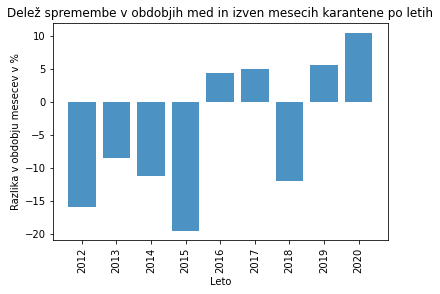

In [170]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
#prikaz grafa

x = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]

plt.figure
plt.bar(x, y, align="center", width=0.8, alpha=0.8)
plt.gca().set_xticklabels(x, rotation=90)
plt.title("Delež spremembe v obdobjih med in izven mesecih karantene po letih")
plt.ylabel("Razlika v obdobju mesecev v %")
plt.xlabel("Leto")

In [ ]:
#Izračunamo kolikšen delež so predstavljala kaznjiva dejanja v družini


### 2. Ali se je med karanteno spremenila pogostost drugih kaznivih dejanj?

In [ ]:
df_prva_druga_leta = df.loc[(4 <= df['MesecStoritve']) & (df['MesecStoritve'] <= 5) & (df['LetoStoritve'] < 2020)]
df_druga_druga_leta = df.loc[(11 <= df['MesecStoritve']) & (df['LetoStoritve'] < 2020)]
df_spl_druga_leta = df.loc[~(((4 <= df['MesecStoritve']) & (df['MesecStoritve'] <= 5) & (df['LetoStoritve'] < 2020)) & ((11 <= df['MesecStoritve']) & (df['LetoStoritve'] < 2020)))]

In [ ]:
kriminali = df["OpisKD"]
temp = []
for k in kriminali:
    x = k.split(" - ")
    if (x[1] == ""):
        temp.append(k)
    else:
        temp.append(x[1])

kriminali = pd.unique(temp)
len(kriminali)

235

In [ ]:
prva_stevci = []
druga_stevci = []
spl_stevci = []
prva_leta_stevci = []
druga_leta_stevci = []
spl_leta_stevci = []

for k in kriminali:
    x = df_prva[df_prva["OpisKD"].str.contains(k)]
    prva_stevci.append((k, len(x)))
    x = df_druga[df_druga["OpisKD"].str.contains(k)]
    druga_stevci.append((k, len(x)))
    x = df_spl[df_spl["OpisKD"].str.contains(k)]
    spl_stevci.append((k, len(x)))
    
    x = df_prva_druga_leta[df_prva_druga_leta["OpisKD"].str.contains(k)]
    prva_leta_stevci.append((k, len(x)))
    x = df_druga_druga_leta[df_druga_druga_leta["OpisKD"].str.contains(k)]
    druga_leta_stevci.append((k, len(x)))
    x = df_spl_druga_leta[df_spl_druga_leta["OpisKD"].str.contains(k)]
    spl_leta_stevci.append((k, len(x)))
    
    
# VELIKA TATVINA je podvojena (najprej pod TATVINA, nato še pod VELIKA TATVINA) !!!

In [ ]:
print("     KAZNIVO DEJANJE      | PRVA KARENTENA | AVG. PREJ. LET | DRUGA KARENTENA | AVG. PREJ. LET")
print("-----------------------------------------------------------------------------------------------")
for i in range(0, len(kriminali)):
    print("%25.25s | %14d | %14.2f | %15d | %14.2f" % (kriminali[i], prva_stevci[i][1], prva_leta_stevci[i][1] / 8, druga_stevci[i][1], druga_leta_stevci[i][1] / 8))
    

     KAZNIVO DEJANJE      | PRVA KARENTENA | AVG. PREJ. LET | DRUGA KARENTENA | AVG. PREJ. LET
-----------------------------------------------------------------------------------------------
                  GENOCID |              0 |           0.00 |               0 |           0.00
                  TATVINA |           4510 |        9090.38 |            3583 |        9089.00
           VELIKA TATVINA |           1531 |        3203.50 |            1229 |        3419.62
              PRIKRIVANJE |             75 |         137.50 |              70 |         124.12
 POŠKODOVANJE TUJE STVARI |            818 |         963.38 |             672 |         970.12
                GOLJUFIJA |           1625 |        2310.62 |             950 |        2694.00
                  GROŽNJA |            699 |         513.00 |             604 |         534.75
  ODVZEM MOTORNEGA VOZILA |             31 |          40.38 |              28 |          43.00
NEUPRAVIČENA PROIZVODNJA  |            283 |     

In [ ]:
# Štetje po vsakem letu posebaj

df_2012_prva = df.loc[(4 <= df['MesecStoritve']) & (df['MesecStoritve'] <= 5) & (df['LetoStoritve'] == 2012)]
df_2012_druga = df.loc[(11 <= df['MesecStoritve']) & (df['LetoStoritve'] == 2012)]
df_2013_prva = df.loc[(4 <= df['MesecStoritve']) & (df['MesecStoritve'] <= 5) & (df['LetoStoritve'] == 2013)]
df_2013_druga = df.loc[(11 <= df['MesecStoritve']) & (df['LetoStoritve'] == 2013)]
df_2014_prva = df.loc[(4 <= df['MesecStoritve']) & (df['MesecStoritve'] <= 5) & (df['LetoStoritve'] == 2014)]
df_2014_druga = df.loc[(11 <= df['MesecStoritve']) & (df['LetoStoritve'] == 2014)]
df_2015_prva = df.loc[(4 <= df['MesecStoritve']) & (df['MesecStoritve'] <= 5) & (df['LetoStoritve'] == 2015)]
df_2015_druga = df.loc[(11 <= df['MesecStoritve']) & (df['LetoStoritve'] == 2015)]
df_2016_prva = df.loc[(4 <= df['MesecStoritve']) & (df['MesecStoritve'] <= 5) & (df['LetoStoritve'] == 2016)]
df_2016_druga = df.loc[(11 <= df['MesecStoritve']) & (df['LetoStoritve'] == 2016)]
df_2017_prva = df.loc[(4 <= df['MesecStoritve']) & (df['MesecStoritve'] <= 5) & (df['LetoStoritve'] == 2017)]
df_2017_druga = df.loc[(11 <= df['MesecStoritve']) & (df['LetoStoritve'] == 2017)]
df_2018_prva = df.loc[(4 <= df['MesecStoritve']) & (df['MesecStoritve'] <= 5) & (df['LetoStoritve'] == 2018)]
df_2018_druga = df.loc[(11 <= df['MesecStoritve']) & (df['LetoStoritve'] == 2018)]
df_2019_prva = df.loc[(4 <= df['MesecStoritve']) & (df['MesecStoritve'] <= 5) & (df['LetoStoritve'] == 2019)]
df_2019_druga = df.loc[(11 <= df['MesecStoritve']) & (df['LetoStoritve'] == 2019)]

prva_2012 = []
prva_2013 = []
prva_2014 = []
prva_2015 = []
prva_2016 = []
prva_2017 = []
prva_2018 = []
prva_2019 = []

druga_2012 = []
druga_2013 = []
druga_2014 = []
druga_2015 = []
druga_2016 = []
druga_2017 = []
druga_2018 = []
druga_2019 = []

for k in kriminali:
    x = df_2012_prva[df_2012_prva["OpisKD"].str.contains(k)]
    prva_2012.append((k, len(x)))
    x = df_2012_druga[df_2012_druga["OpisKD"].str.contains(k)]
    druga_2012.append((k, len(x)))
    
    x = df_2013_prva[df_2013_prva["OpisKD"].str.contains(k)]
    prva_2013.append((k, len(x)))
    x = df_2013_druga[df_2013_druga["OpisKD"].str.contains(k)]
    druga_2013.append((k, len(x)))
    
    x = df_2014_prva[df_2014_prva["OpisKD"].str.contains(k)]
    prva_2014.append((k, len(x)))
    x = df_2014_druga[df_2014_druga["OpisKD"].str.contains(k)]
    druga_2014.append((k, len(x)))
    
    x = df_2015_prva[df_2015_prva["OpisKD"].str.contains(k)]
    prva_2015.append((k, len(x)))
    x = df_2015_druga[df_2015_druga["OpisKD"].str.contains(k)]
    druga_2015.append((k, len(x)))
    
    x = df_2016_prva[df_2016_prva["OpisKD"].str.contains(k)]
    prva_2016.append((k, len(x)))
    x = df_2016_druga[df_2016_druga["OpisKD"].str.contains(k)]
    druga_2016.append((k, len(x)))
    
    x = df_2017_prva[df_2017_prva["OpisKD"].str.contains(k)]
    prva_2017.append((k, len(x)))
    x = df_2017_druga[df_2017_druga["OpisKD"].str.contains(k)]
    druga_2017.append((k, len(x)))
    
    x = df_2018_prva[df_2018_prva["OpisKD"].str.contains(k)]
    prva_2018.append((k, len(x)))
    x = df_2018_druga[df_2018_druga["OpisKD"].str.contains(k)]
    druga_2018.append((k, len(x)))
    
    x = df_2019_prva[df_2019_prva["OpisKD"].str.contains(k)]
    prva_2019.append((k, len(x)))
    x = df_2019_druga[df_2019_druga["OpisKD"].str.contains(k)]
    druga_2019.append((k, len(x)))
    

In [ ]:
%matplotlib inline
import matplotlib
%config InlineBackend.figure_format = 'jpg'
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt

In [ ]:
for i in range(0, len(kriminali)):
    print(i, kriminali[i])

0 GENOCID
1 TATVINA
2 VELIKA TATVINA
3 PRIKRIVANJE
4 POŠKODOVANJE TUJE STVARI
5 GOLJUFIJA
6 GROŽNJA
7 ODVZEM MOTORNEGA VOZILA
8 NEUPRAVIČENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V ŠPORTU IN PREDHOD
9 ZLORABA POLOŽAJA ALI ZAUPANJA PRI GOSPODARSKI DEJAVNOSTI
10 PONAREDITEV ALI UNIČENJE POSLOVNIH LISTIN
11 ZATAJITEV
12 DAVČNA ZATAJITEV
13 POSLOVNA GOLJUFIJA
14 PONAREJANJE LISTIN
15 PONEVERBA IN NEUPRAVIČENA UPORABA TUJEGA PREMOŽENJA
16 KRIVA OVADBA
17 OGROŽANJE Z NEVARNIM ORODJEM PRI PRETEPU ALI PREPIRU
18 NEVESTNO DELO V SLUŽBI
19 PRANJE DENARJA
20 IZNEVERJENJE
21 NASILNIŠTVO
22 PREPOVEDANO PREHAJANJE MEJE ALI OZEMLJA DRŽAVE
23 ZLORABA URADNEGA POLOŽAJA ALI URADNIH PRAVIC
24 LAHKA TELESNA POŠKODBA
25 OŠKODOVANJE TUJIH PRAVIC
26 ZLORABA ZNAMENJ ZA POMOČ IN NEVARNOST
27 ROP
28 PONAREDITEV ALI UNIČENJE URADNE LISTINE, KNJIGE, SPISA ALI ARHIVSKEGA GRADIVA
29 NASILJE V DRUŽINI
30 ZANEMARJANJE MLADOLETNE OSEBE IN SUROVO RAVNANJE
31 UPORABA PONAREJENEGA NEGOTOVINS

<ipython-input-11-fb2da71825af>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x, rotation=90)


Text(0.5, 0, 'Leto')

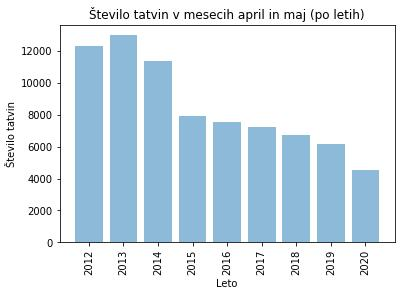

In [ ]:
###### Izris za prvi krog karanten (APRIL in MAJ) ######

i = 1   # Nastavi indeks kaznivega dejanja

x = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
y = [prva_2012[i][1], prva_2013[i][1], prva_2014[i][1], prva_2015[i][1], prva_2016[i][1], prva_2017[i][1], prva_2018[i][1], prva_2019[i][1], prva_stevci[i][1]]

plt.figure
plt.bar(x, y, align="center", width=0.8, alpha=0.5)

# POTREBNA JE POPRAVA NASLOVOV
plt.gca().set_xticklabels(x, rotation=90)
plt.title("Število tatvin v mesecih april in maj (po letih)")
plt.ylabel("Število tatvin")
plt.xlabel("Leto")

<ipython-input-12-8cb656a1f439>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x, rotation=90)


Text(0.5, 0, 'Leto')

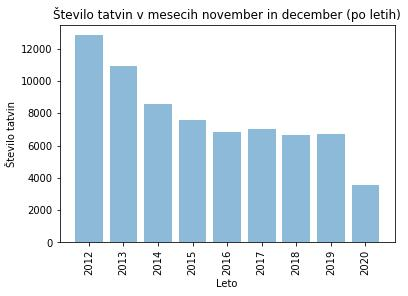

In [ ]:
###### Izris za drugi krog karanten (NOVEMBER in DECEMBER) ######

i = 1   # Nastavi indeks kaznivega dejanja

y = [druga_2012[i][1], druga_2013[i][1], druga_2014[i][1], druga_2015[i][1], druga_2016[i][1], druga_2017[i][1], druga_2018[i][1], druga_2019[i][1], druga_stevci[i][1]]

plt.figure
plt.bar(x, y, align="center", width=0.8, alpha=0.5)

# POTREBNA JE POPRAVA NASLOVOV
plt.gca().set_xticklabels(x, rotation=90)
plt.title("Število tatvin v mesecih november in december (po letih)")
plt.ylabel("Število tatvin")
plt.xlabel("Leto")

### 3. Kako je uvedba policijske ure vplivala na kriminal v nočnem času?

In [ ]:
df_policijska = df.loc[((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2020) & (df['UraStoritve'] >= 21)) | 
                       ((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2020) & (df['UraStoritve'] <= 6)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2021) & (df['UraStoritve'] >= 21)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2021) & (df['UraStoritve'] <= 6))
                      ]

df_2012 = df.loc[((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2012) & (df['UraStoritve'] >= 21)) | 
                       ((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2012) & (df['UraStoritve'] <= 6)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2013) & (df['UraStoritve'] >= 21)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2013) & (df['UraStoritve'] <= 6))
                      ]

df_2013 = df.loc[((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2013) & (df['UraStoritve'] >= 21)) | 
                       ((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2013) & (df['UraStoritve'] <= 6)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2014) & (df['UraStoritve'] >= 21)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2014) & (df['UraStoritve'] <= 6))
                      ]

df_2014 = df.loc[((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2014) & (df['UraStoritve'] >= 21)) | 
                       ((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2014) & (df['UraStoritve'] <= 6)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2015) & (df['UraStoritve'] >= 21)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2015) & (df['UraStoritve'] <= 6))
                      ]

df_2015 = df.loc[((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2015) & (df['UraStoritve'] >= 21)) | 
                       ((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2015) & (df['UraStoritve'] <= 6)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2016) & (df['UraStoritve'] >= 21)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2016) & (df['UraStoritve'] <= 6))
                      ]

df_2016 = df.loc[((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2016) & (df['UraStoritve'] >= 21)) | 
                       ((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2016) & (df['UraStoritve'] <= 6)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2017) & (df['UraStoritve'] >= 21)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2017) & (df['UraStoritve'] <= 6))
                      ]

df_2017 = df.loc[((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2017) & (df['UraStoritve'] >= 21)) | 
                       ((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2017) & (df['UraStoritve'] <= 6)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2018) & (df['UraStoritve'] >= 21)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2018) & (df['UraStoritve'] <= 6))
                      ]

df_2018 = df.loc[((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2018) & (df['UraStoritve'] >= 21)) | 
                       ((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2018) & (df['UraStoritve'] <= 6)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2019) & (df['UraStoritve'] >= 21)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2019) & (df['UraStoritve'] <= 6))
                      ]

df_2019 = df.loc[((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2019) & (df['UraStoritve'] >= 21)) | 
                       ((df['MesecStoritve'] >= 10) & (df['LetoStoritve'] == 2019) & (df['UraStoritve'] <= 6)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2020) & (df['UraStoritve'] >= 21)) |
                       ((df['MesecStoritve'] <= 4) & (df['LetoStoritve'] == 2020) & (df['UraStoritve'] <= 6))
                      ]

In [ ]:
policijska_2012 = []
policijska_2013 = []
policijska_2014 = []
policijska_2015 = []
policijska_2016 = []
policijska_2017 = []
policijska_2018 = []
policijska_2019 = []
policijska_2020 = []


for k in kriminali:
    x = df_2012[df_2012["OpisKD"].str.contains(k)]
    policijska_2012.append((k, len(x)))
    
    x = df_2013[df_2013["OpisKD"].str.contains(k)]
    policijska_2013.append((k, len(x)))
    
    x = df_2014[df_2014["OpisKD"].str.contains(k)]
    policijska_2014.append((k, len(x)))
    
    x = df_2015[df_2015["OpisKD"].str.contains(k)]
    policijska_2015.append((k, len(x)))
    
    x = df_2016[df_2016["OpisKD"].str.contains(k)]
    policijska_2016.append((k, len(x)))
    
    x = df_2017[df_2017["OpisKD"].str.contains(k)]
    policijska_2017.append((k, len(x)))
    
    x = df_2018[df_2018["OpisKD"].str.contains(k)]
    policijska_2018.append((k, len(x)))
    
    x = df_2019[df_2019["OpisKD"].str.contains(k)]
    policijska_2019.append((k, len(x)))
    
    x = df_policijska[df_policijska["OpisKD"].str.contains(k)]
    policijska_2020.append((k, len(x)))

In [ ]:
print("     KAZNIVO DEJANJE      |       2020     |       2019     |       2018      |       2017     ")
print("-----------------------------------------------------------------------------------------------")
for i in range(0, len(kriminali)):
    print("%25.25s | %14d | %14d | %15d | %14d" % (kriminali[i], policijska_2020[i][1], policijska_2019[i][1], policijska_2018[i][1], policijska_2017[i][1]))
    

     KAZNIVO DEJANJE      |       2020     |       2019     |       2018      |       2017     
-----------------------------------------------------------------------------------------------
                  GENOCID |              0 |              0 |               0 |              0
                  TATVINA |           1996 |           4325 |            4841 |           5413
           VELIKA TATVINA |           1025 |           2344 |            2483 |           2584
              PRIKRIVANJE |             82 |            102 |              80 |            135
 POŠKODOVANJE TUJE STVARI |            636 |            903 |             790 |            884
                GOLJUFIJA |           1203 |           2432 |            2258 |           2383
                  GROŽNJA |            337 |            528 |             442 |            490
  ODVZEM MOTORNEGA VOZILA |             20 |             35 |              77 |             37
NEUPRAVIČENA PROIZVODNJA  |            208 |    

<ipython-input-36-6c946bb350d2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x, rotation=90)


Text(0.5, 0, 'Leto')

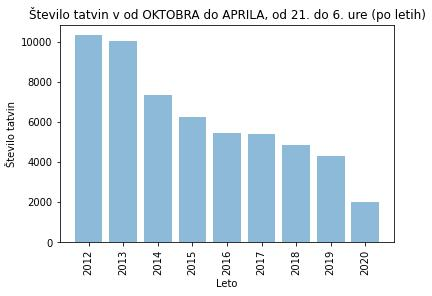

In [ ]:
###### Izris za v času policijske ure (od OKTOBRA do APRILA, od 21. do 6. ure) ######

i = 1   # Nastavi indeks kaznivega dejanja

x = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
y = [policijska_2012[i][1], policijska_2013[i][1], policijska_2014[i][1], policijska_2015[i][1], policijska_2016[i][1], policijska_2017[i][1], policijska_2018[i][1], policijska_2019[i][1], policijska_2020[i][1]]

plt.figure
plt.bar(x, y, align="center", width=0.8, alpha=0.5)

plt.gca().set_xticklabels(x, rotation=90)
plt.title("Število tatvin v od OKTOBRA do APRILA, od 21. do 6. ure (po letih)")
plt.ylabel("Število tatvin")
plt.xlabel("Leto")

<ipython-input-37-6ca7c915d4c2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x, rotation=90)


Text(0.5, 0, 'Leto')

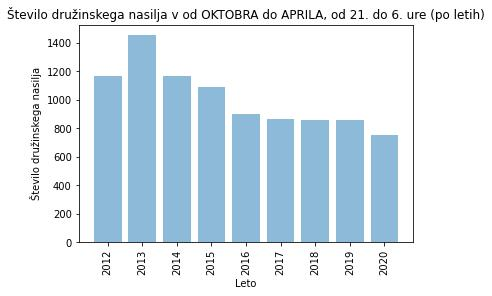

In [ ]:
###### Izris za v času policijske ure (od OKTOBRA do APRILA, od 21. do 6. ure) ######

i = 29   # Nastavi indeks kaznivega dejanja

x = ["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
y = [policijska_2012[i][1], policijska_2013[i][1], policijska_2014[i][1], policijska_2015[i][1], policijska_2016[i][1], policijska_2017[i][1], policijska_2018[i][1], policijska_2019[i][1], policijska_2020[i][1]]

plt.figure
plt.bar(x, y, align="center", width=0.8, alpha=0.5)

plt.gca().set_xticklabels(x, rotation=90)
plt.title("Število družinskega nasilja v od OKTOBRA do APRILA, od 21. do 6. ure (po letih)")
plt.ylabel("Število družinskega nasilja")
plt.xlabel("Leto")